In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.wcs.utils import wcs_to_celestial_frame
from astropy.table import Table
import astropy.units as u

plt.rcParams["figure.figsize"] = (12, 8)

### Read catalogue / table

In [94]:
tab = Table.read("../data/LOFAR_HBA_T1_DR1_catalog_v1.0.srl.fits").to_pandas()
byte_cols = tab.select_dtypes(include=object).columns
tab[byte_cols] = tab[byte_cols].apply(lambda col: col.str.decode("utf-8"))

In [95]:
tab[:600:100].T

,0,100,200,300,400,500
Source_Name,ILTJ122108.44+491340.9,ILTJ122035.85+490531.9,ILTJ122011.12+493506.7,ILTJ121944.57+485455.4,ILTJ121930.77+494052.1,ILTJ121912.38+495111.0
RA,185.285169,185.149359,185.046352,184.93572,184.878206,184.801578
E_RA,0.08507,0.717441,0.449239,0.457824,0.030999,0.289787
E_RA_tot,0.150016,0.728004,0.465922,0.474206,0.127392,0.31503
DEC,49.22804,49.092203,49.585197,48.915403,49.681157,49.85306
E_DEC,0.094025,0.520558,0.517024,0.325903,0.029731,0.313196
E_DEC_tot,0.155269,0.535022,0.531585,0.348541,0.12709,0.336689
Peak_flux,1.487188,0.286217,0.425906,0.361366,4.986902,0.601113
E_Peak_flux,0.052545,0.057533,0.061206,0.055136,0.056715,0.063862
E_Peak_flux_tot,0.302043,0.081159,0.10489,0.090903,0.998992,0.136132


In [99]:
tab.Mosaic_ID.unique()

array(['P22Hetdex04', 'P8Hetdex', 'P35Hetdex10', 'P182+55', 'P187+55',
       'P221+47', 'P210+47', 'P178+55', 'P211+50', 'P200+55', 'P223+50',
       'P218+55', 'P1Hetdex15', 'P227+50', 'P213+47', 'P223+55', 'P6',
       'P3Hetdex16', 'P38Hetdex07', 'P29Hetdex19', 'P219+50',
       'P37Hetdex15', 'P27Hetdex09', 'P214+55', 'P41Hetdex',
       'P34Hetdex06', 'P4Hetdex16', 'P209+55', 'P16Hetdex13',
       'P12Hetdex11', 'P15Hetdex13', 'P30Hetdex06', 'P205+55',
       'P42Hetdex07', 'P21', 'P25Hetdex09', 'P169+55', 'P219+52',
       'P26Hetdex03', 'P11Hetdex12', 'P19Hetdex17', 'P7Hetdex11',
       'P217+47', 'P164+55', 'P191+55', 'P223+52', 'P196+55',
       'P18Hetdex03', 'P14Hetdex04', 'P10Hetdex', 'P206+52',
       'P33Hetdex08', 'P227+53', 'P173+55', 'P225+47', 'P23Hetdex20',
       'P39Hetdex19', 'P206+50'], dtype=object)

## Filter for celestial objects contained in mosaic `P205+55`

In [103]:
tab_205 = tab[tab.Mosaic_ID.str.contains("205\+55")]
tab_205

,Source_Name,RA,E_RA,E_RA_tot,DEC,E_DEC,E_DEC_tot,Peak_flux,E_Peak_flux,E_Peak_flux_tot,...,DC_Min,E_DC_Min,PA,E_PA,DC_PA,E_DC_PA,Isl_rms,S_Code,Mosaic_ID,Isl_id
182259,ILTJ134917.04+535737.2,207.320991,0.918365,0.925241,53.960334,0.307251,0.327231,0.342880,0.058164,0.089921,...,0.000000,0.598017,102.776778,15.348846,0.000000,15.348846,0.060391,S,P205+55,700
182260,ILTJ134916.45+535801.7,207.318522,1.005754,1.012037,53.967151,1.114827,1.120498,0.359912,0.054929,0.090547,...,9.280158,1.552865,141.654091,18.888470,141.654091,18.888470,0.061322,S,P205+55,703
182261,ILTJ134915.23+540433.5,207.313443,0.494325,0.506985,54.075982,0.673964,0.683305,0.312100,0.058940,0.085850,...,0.000000,0.912721,30.876257,28.355189,30.876257,28.355189,0.057573,S,P205+55,721
182262,ILTJ134915.03+540812.1,207.312622,0.347668,0.365446,54.136707,0.210964,0.239130,0.554670,0.056204,0.124359,...,0.000000,0.375646,115.863705,13.531947,0.000000,13.531947,0.059800,S,P205+55,723
182263,ILTJ134911.34+540239.4,207.297256,0.669693,0.679092,54.044286,0.875819,0.883027,0.341026,0.063231,0.093006,...,0.000000,0.848233,146.572349,18.841840,146.572349,18.841840,0.062214,S,P205+55,737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189028,ILTJ134000.89+562526.5,205.003718,5.262746,5.263950,56.424033,4.742395,4.743731,0.172292,0.042644,0.054826,...,33.918022,8.443405,51.120053,30.892938,51.120053,30.892938,0.115351,S,P205+55,9430
189029,ILTJ133759.61+550106.4,204.498375,3.382845,3.384719,55.018459,5.678859,5.679975,0.217335,0.032240,0.054119,...,46.718391,6.945543,160.701417,15.573662,160.701417,15.573662,0.127893,S,P205+55,9431
189030,ILTJ133614.95+544711.3,204.062292,5.969434,5.970496,54.786475,7.216801,7.217680,0.093713,0.031148,0.036352,...,41.402530,13.856922,12.651578,78.427910,12.651578,78.427910,0.087336,S,P205+55,9432
189031,ILTJ133340.22+540139.8,203.417603,5.928081,5.929151,54.027725,7.145678,7.146565,0.077395,0.013847,0.020768,...,72.792602,13.050592,153.679365,31.322155,153.679365,31.322155,0.069536,S,P205+55,9434


## Read mosaic / image

In [38]:
hdu = fits.open("../data/P205+55-mosaic.fits")[0]
hdu

## Erklärung für Header Einträge
https://www.aanda.org/articles/aa/full/2002/45/aah3859/aah3859.right.html

In [39]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8932                                                  
NAXIS2  =                 8932                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4466                                                  
CRPIX2  =                 4466                                                  
CRVAL1  =        205.0552666

 Mosaic header in WCS-Objekt einlesen

In [40]:
wcs = WCS(hdu.header)

In [41]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 205.055266667  54.8981944444  
CRPIX : 4466.0  4466.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666666  0.000416666666666666  
NAXIS : 8932  8932

In [42]:
wcs.wcs_pix2world([
    (0, 0), 
    (8932, 0), 
    (0 ,8932),
    (8932,8932)
], 0)

array([[208.14784917,  52.99634126],
       [201.9613002 ,  52.99630443],
       [208.44716637,  56.71468256],
       [201.6618495 ,  56.71464217]])

In [43]:
wcs.wcs_world2pix([(205, 54)], 0)

array([[4542.96382424, 2309.45238814]])

## Plotting projection with WCS axes

In [46]:
import matplotlib.pyplot as plt

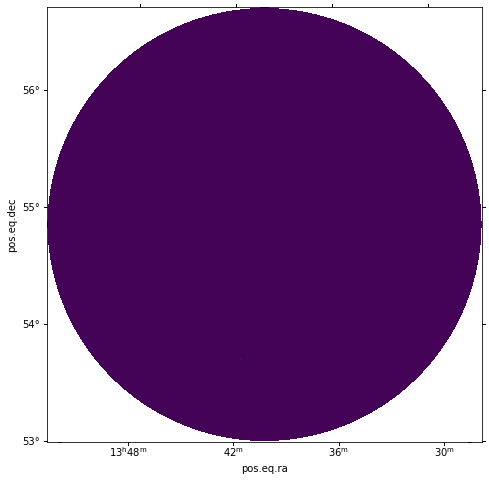

In [48]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdu.data);

In [44]:
hpc_frame = wcs_to_celestial_frame(wcs)
hpc_frame

<ICRS Frame>

In [45]:
SkyCoord(100*u.arcsec, -100*u.arcsec, frame=hpc_frame)

<SkyCoord (ICRS): (ra, dec) in deg
    (0.02777778, -0.02777778)>